In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('nbaallelo.csv',index_col='game_id')
df = df[df['game_location']!='A'] 

In [3]:
new_team = {
    'CHO':'CHA',
    'NOP':'NOH',
    'BRK':'NJN',
    'OKC':'SEA',
    'NOK':'NOH',
    'NOH':'CHH',
    'MEM':'VAN',
    'WAS':'WSB',
    'SAC':'KCK',
    'LAC':'SDC',
    'UTA':'NOJ',
    'SDC':'BUF',
    'NJN':'NYN',
    'GSW':'SFW',
    'DLC':'TEX',
    'HOU':'SDR',
    'CHA':'CHH',
    'SAA':'TEX',
    'SAS':'SAA',
    'DEN':'DNA',
    'DNA':'DNR',
    'WSB':'CAP',
    'CAP':'BAL',
    'BAL':'CHZ',
    'CHZ':'CHP',
    'SDS':'SDA',
    'FLO':'MMF',
    'MMF':'MNM',
    'SFW':'PHW',
    'LAL':'MNL',
    'LAS':'ANA',
    'UTS':'LAS',
    'CAR':'HSM',
    'SSL':'CAR',
    'DET':'FTW',
    'MLH':'TRI',
    'STL':'MLH',
    'ATL':'STL',
    'PHI':'SYR',
    'CIN':'ROC',
    'PTC':'PTP',
    'MNP':'PTP',
    'PTP':'MNP',
    'MMP':'NOB',
    'MMT':'MMP',
    'MMS':'MMT',
    'VIR':'WSA',
    'WSA':'OAK'
}

In [52]:
def elo_acc_pid(KP=20,KD=0,KI=0,HFA=100,SW=0.75,ELOW=400,LPF=1.0):
    NEW_TEAM=1300
    elo = {}
    iterm = {}
    dterm = {}
    year_id = 1947
    x1s = []
    x2s = []
    movs = []
    correct = 0
    games = 0
    for i,row in enumerate(df.itertuples()):
        #if (i%2) == 1:
        #    continue
        if row[3] != 0:
            continue
        if row[4] != year_id:
            iterm = {}
            dterm = {}
            for k in elo:
                elo[k] = SW*elo[k] + (1-SW)*1500
            year_id +=1
            teams1 = set(list(df[df.year_id == year_id-1].team_id.unique()) + list(df[df.year_id == year_id-1].opp_id.unique()))

            teams2 = set(list(df[df.year_id == year_id].team_id.unique()) + list(df[df.year_id == year_id].opp_id.unique()))
            #print(len(teams1),len(teams2))
            for t in [_ for _ in teams2 if not _ in teams1]:
                if t in new_team and not t in elo and new_team[t] in elo:
                    #print(t,new_team[t])
                    elo[t] = elo[new_team[t]]
  


        t1,t2=row[8],row[14]
        elo_i,elo_n = row[11],row[12]
        opp_elo_i,opp_elo_n = row[17],row[18]
        p1,p2 = row[10],row[16]
        elo1 = elo.get(t1,NEW_TEAM) + HFA
        if row[-4] == 'N':
            elo1 -= HFA
        elo2 = elo.get(t2,NEW_TEAM)

        winp = 1.0 / (np.exp(-(elo1-elo2)/ELOW) + 1)

        mov = abs(p1-p2)
        elo_diff_w  = (elo2 - elo1)

        if p1 > p2:
            hm,am = 1,-1
            add_t = (1-winp)
        else:
            hm,am = -1,1
            add_t = (winp)

        #print(mofv_m,mov)
        if row[-4] == 'N':
            elo[t1] = elo1 + KP*hm*add_t + KD*(hm*add_t - dterm.get(t1,hm*add_t)) + KI*iterm.get(t1,0)
        else:
            elo[t1] = elo1 + KP*hm*add_t - HFA + KD*(hm*add_t - dterm.get(t1,hm*add_t)) + KI*iterm.get(t1,0)

        elo[t2] = elo2 + KP*am*add_t + KD*(am*add_t - dterm.get(t2,am*add_t)) + KI*iterm.get(t2,0)
        dterm[t1] = LPF*hm*add_t + (1-LPF)*dterm.get(t1,hm*add_t)
        dterm[t2] = LPF*am*add_t + (1-LPF)*dterm.get(t2,am*add_t)
        iterm[t1] = iterm.get(t1,0) + hm*add_t
        iterm[t2] = iterm.get(t2,0) + am*add_t
        a = (winp if p1 > p2 else (1.0-winp))
        b = int((elo1 > elo2) == (p1 > p2))
        if year_id > 2004:
            #a = a ** (1/3)
            correct += (b+a/20)#(a*b) ** (1/4)
            games += 1
        else:
            #pass
            #a = a ** (1/3)
            correct += 0.25*(b+a/20)#*(a*b) ** (1/4)
            games += 0.25* 1.0
        #print(elo1,elo2)
        #print(p1,p2)
        #print(winp)
    return correct/games,elo
def opt_elo_pid(x):
    #print(x*xn)
    #print(x[0])
    return 1.0-elo_acc_pid(*x[0])[0]
elo_acc_pid(162.42, 8.01, 1.96, 582.26, 0.64, 913.55, 0.22, )[0],elo_acc_pid(138.86, -5.98, -0.64, 497.16, 0.68, 976.97, 0.23, )[0],elo_acc_pid(89.59, -1.81, 0.30, 345.82, 0.88, 545.69, 0.15, )[0],elo_acc_pid(108.52, 6.46, 6.30, 534.00, 0.52, 558.28, 0.89, )[0],elo_acc_pid(154.28, 2.78, -0.19, 300.00, 0.50, 473.63, 1.00,)[0],elo_acc_pid(59.91, 5.00, -0.16, 191.44, 0.50, 618.80, 1.00)[0],elo_acc_pid(81.41230187,   0.        ,   0.        , 241.40955643,       0.5       , 465.8921979)[0]
#elo_acc_pid()[0],elo_acc_pid(48.50966651,   2.12760447,   2.75210362, 228.5307296 ,  0.70628066, 213.25045187)[0],elo_acc_pid(5.49857792e+01, 0.00000000e+00, 3.65703301e-01, 2.18445917e+02,0.5, 5.60814536e+02)[0],elo_acc_pid(70.        ,   1.        ,   0.        , 199.27966601,         0.5       , 406.51863861)[0],elo_acc_pid(81.41230187,   0.        ,   0.        , 241.40955643,       0.5       , 465.8921979)[0]

(0.7050435625824366,
 0.7048599640014138,
 0.7050031596218479,
 0.6994427547340278,
 0.7007145059072533,
 0.702806965475345,
 0.7058209135657951)

In [54]:
def elo_acc_simple(K=20,HFA=100,SW=0.75,ELOW=400):
    NEW_TEAM=1300
    elo = {}
    year_id = 1947
    x1s = []
    x2s = []
    movs = []
    correct = 0
    games = 0
    for i,row in enumerate(df.itertuples()):
        #if (i%2) == 1:
        #    continue
        if row[3] != 0:
            continue
        if row[4] != year_id:
            for k in elo:
                elo[k] = SW*elo[k] + (1-SW)*1500
            year_id +=1
            teams1 = set(list(df[df.year_id == year_id-1].team_id.unique()) + list(df[df.year_id == year_id-1].opp_id.unique()))

            teams2 = set(list(df[df.year_id == year_id].team_id.unique()) + list(df[df.year_id == year_id].opp_id.unique()))
            #print(len(teams1),len(teams2))
            for t in [_ for _ in teams2 if not _ in teams1]:
                if t in new_team and not t in elo and new_team[t] in elo:
                    #print(t,new_team[t])
                    elo[t] = elo[new_team[t]]

        t1,t2=row[8],row[14]
        elo_i,elo_n = row[11],row[12]
        opp_elo_i,opp_elo_n = row[17],row[18]
        p1,p2 = row[10],row[16]
        elo1 = elo.get(t1,NEW_TEAM) + HFA
        if row[-4] == 'N':
            elo1 -= HFA
        elo2 = elo.get(t2,NEW_TEAM)

        winp = 1.0 / (np.exp(-(elo1-elo2)/ELOW) + 1)

        mov = abs(p1-p2)
        elo_diff_w  = (elo2 - elo1)

        if p1 > p2:
            hm,am = 1,-1
            add_t = K*(1-winp)
        else:
            hm,am = -1,1
            add_t = K*(winp)

        #print(mofv_m,mov)
        if row[-4] == 'N':
            elo[t1] = elo1 + hm*add_t
        else:
            elo[t1] = elo1 + hm*add_t - HFA

        elo[t2] = elo2 + am*add_t
        a = (winp if p1 > p2 else (1.0-winp))
        b = int((elo1 > elo2) == (p1 > p2))
        if year_id > 2004:
            #a = a ** (1/3)
            correct += (b+a/20)# ** (1/4)
            games += 1
        else:
            pass
            #a = a ** (1/3)
            correct += 0.25*(b+a/20)# ** (1/4)
            games += 0.25
        #print(elo1,elo2)
        #print(p1,p2)
        #print(winp)
    return correct/games,elo
def opt_elo_simple(x):
    #print(x*xn)
    #print(x[0])
    return 1.0-elo_acc_simple(*x[0])[0]
elo_acc_simple()[0],elo_acc_simple(  46.61532809, 158.13274302,   0.66624445, 366.61376855)[0],elo_acc_simple(  60,215,0.5, 560)[0]

(0.6930954703349123, 0.7041158318714411, 0.7048320577954126)

In [55]:
def elo_acc(K=20,HFA=100,SW=0.75,MOVM=3,ELOW=400):
    INTERCEPT=7.5
    SLOPE=0.006
    POW=0.8
    NEW_TEAM=1300
    elo = {}
    year_id = 1947
    ELOW=400
    x1s = []
    x2s = []
    movs = []
    correct = 0
    games = 0
    for i,row in enumerate(df.itertuples()):
        #if (i%2) == 1:
        #    continue
        if row[3] != 0:
            continue
        if row[4] != year_id:
            for k in elo:
                elo[k] = SW*elo[k] + (1-SW)*1505
            year_id +=1
            teams1 = set(list(df[df.year_id == year_id-1].team_id.unique()) + list(df[df.year_id == year_id-1].opp_id.unique()))

            teams2 = set(list(df[df.year_id == year_id].team_id.unique()) + list(df[df.year_id == year_id].opp_id.unique()))
            #print(len(teams1),len(teams2))
            for t in [_ for _ in teams2 if not _ in teams1]:
                if t in new_team and not t in elo and new_team[t] in elo:
                    #print(t,new_team[t])
                    elo[t] = elo[new_team[t]]

        t1,t2=row[8],row[14]
        elo_i,elo_n = row[11],row[12]
        opp_elo_i,opp_elo_n = row[17],row[18]
        p1,p2 = row[10],row[16]
        elo1 = elo.get(t1,NEW_TEAM) + HFA
        if row[-4] == 'N':
            elo1 -= HFA
        elo2 = elo.get(t2,NEW_TEAM)
        #if t1 not in elo:
        #    print(t1,row[9],len(elo),year_id)
        #if t2 not in elo:
        #    print(t2,row[15],len(elo),year_id)
        winp = 1.0 / (10 ** (-(elo1-elo2)/ELOW) + 1)

        mov = abs(p1-p2)
        elo_diff_w  = (elo2 - elo1)
        mofv_m1 = ((mov+MOVM) ** POW)/(INTERCEPT + SLOPE*(-elo_diff_w))
        mofv_m2 = ((mov+MOVM) ** POW)/(INTERCEPT + SLOPE*(elo_diff_w))

        if p1 > p2:
            hm,am = 1,-1
            add_t = K*(1-winp)*mofv_m1
        else:
            hm,am = -1,1
            add_t = K*(winp)*mofv_m2

        #print(mofv_m,mov)
        if row[-4] == 'N':
            elo[t1] = elo1 + hm*add_t
        else:
            elo[t1] = elo1 + hm*add_t - HFA

        elo[t2] = elo2 + am*add_t
        a = (winp if p1 > p2 else (1.0-winp))
        b = int((elo1 > elo2) == (p1 > p2))
        if year_id > 2004:
            #a = a ** (1/3)
            correct += (b+a/20) ** (1/4)
            games += 1
        else:
            pass
            #a = a ** (1/3)
            correct += 0.25*(b+a/20)#*(a*b) ** (1/4)
            games += 0.25
        #print(elo1,elo2)
        #print(p1,p2)
        #print(winp)
    return correct/games,elo
def opt_elo(x):
    #print(x*xn)
    #print(x[0])
    return 1.0-elo_acc(*x[0])[0]
elo_acc(20,100,0.75,3,400)[0],elo_acc(42,107,0.95,0,400)[0],elo_acc(53,155,0.95,0,400.)[0],elo_acc(22.6,81.5,0.5,0.,400.)[0],elo_acc(34,100,0.5,0.,400.)[0],elo_acc(4.        ,  81.94891483,   0.95      , 134.72834631)[0]

(0.7574887473196558,
 0.7564172595763653,
 0.7542399692600493,
 0.7596822115710735,
 0.7593989858861915,
 0.7560193423874519)

In [51]:
_,elo =elo_acc(20,100,0.75,3,400)
rests = []
for t in df[df.year_id == 2015].team_id.unique():
    #print(t,elo[t])
    rests.append((elo[t],t))
for s,t in sorted(rests,reverse=True):
    print('{}\t{:.2f}'.format(t,s))
_,elo=elo_acc(34,100,0.5,0.,400.)
rests = []
print('\n')
for t in df[df.year_id == 2015].team_id.unique():
    #print(t,elo[t])
    rests.append((elo[t],t))
for s,t in sorted(rests,reverse=True):
    print('{}\t{:.2f}'.format(t,s))
_,elo= elo_acc_pid(81.41230187,   0.        ,   0.        , 241.40955643,       0.5       , 465.8921979)
rests = []
print('\n')
for t in df[df.year_id == 2015].team_id.unique():
    #print(t,elo[t])
    rests.append((elo[t],t))
for s,t in sorted(rests,reverse=True):
    print('{}\t{:.2f}'.format(t,s))
_,elo =elo_acc_pid(162.42, 8.01, 1.96, 582.26, 0.64, 913.55, 0.22, )
rests = []
print('\n')
for t in df[df.year_id == 2015].team_id.unique():
    #print(t,elo[t])
    rests.append((elo[t],t))
for s,t in sorted(rests,reverse=True):
    print('{}\t{:.2f}'.format(t,s))

GSW	1823.57
SAS	1721.05
LAC	1694.63
CLE	1690.98
HOU	1654.73
MEM	1608.44
CHI	1591.14
OKC	1583.32
ATL	1580.88
POR	1556.83
DAL	1556.67
UTA	1555.38
WAS	1546.20
NOP	1526.66
BOS	1524.66
IND	1504.96
TOR	1500.49
PHO	1466.93
DET	1461.17
BRK	1457.83
MIA	1455.95
MIL	1443.36
DEN	1422.45
SAC	1418.37
CHO	1400.82
ORL	1311.98
LAL	1283.33
PHI	1276.28
MIN	1264.05
NYK	1255.78


GSW	1876.22
SAS	1755.99
CLE	1719.17
LAC	1707.60
HOU	1676.00
CHI	1615.95
MEM	1610.04
OKC	1588.58
UTA	1588.11
ATL	1577.80
WAS	1555.58
DAL	1553.97
BOS	1550.82
POR	1542.26
NOP	1526.96
IND	1508.38
TOR	1487.98
DET	1471.27
MIA	1450.30
PHO	1443.92
BRK	1438.54
MIL	1432.71
DEN	1429.60
SAC	1424.53
CHO	1374.75
ORL	1299.98
PHI	1269.37
LAL	1243.63
MIN	1217.45
NYK	1212.31


GSW	2394.99
CLE	2122.88
SAS	2021.31
HOU	2013.77
LAC	2013.59
MEM	1860.01
ATL	1756.41
CHI	1675.89
OKC	1657.50
DAL	1656.42
WAS	1624.91
NOP	1612.21
BOS	1605.86
UTA	1587.57
IND	1556.26
POR	1555.48
BRK	1497.49
TOR	1431.43
MIL	1392.71
PHO	1361.17
MIA	1354.31
DET	1324.47
DEN	1217.21


In [43]:
import GPyOpt
import GPy
#bounds = [(10,60),(0,200),(0.5,0.95),(0,6),(400,400)]
#bounds = [(10,60),(0,300),(0.5,0.95),(10,800)]
bounds = [(10,200),(-10,10),(-10,10),(0,600),(0.5,0.95),(50,1000),(0,1)]

bounds2 = [{'name': 'var_{}'.format(i), 'type': 'continuous', 'domain': _} for i,_ in enumerate(bounds)]  # problem constraints 
myBopt = GPyOpt.methods.BayesianOptimization(f=opt_elo_pid,            # function to optimize
                                             model_type='GP',
                                             domain=bounds2,        # box-constraints of the problem
                                             initial_design_numdata=10,
                                             acquisition_type='EI',
                                             exact_feval = True,
                                        
                                                num_cores=2,
                                                verbosity=True) # Selects the Expected improvement
max_iter = 1500     # evaluation budget
max_time = 600     # time budget 
eps      = 10e-6  # Minimum allows distance between the las two observations

myBopt.run_optimization(max_iter, max_time, eps,verbosity=True)     

num acquisition: 1, time elapsed: 1.61s
num acquisition: 2, time elapsed: 3.48s
num acquisition: 3, time elapsed: 5.07s
num acquisition: 4, time elapsed: 7.10s
num acquisition: 5, time elapsed: 9.02s
num acquisition: 6, time elapsed: 10.68s
num acquisition: 7, time elapsed: 12.38s
num acquisition: 8, time elapsed: 14.02s
num acquisition: 9, time elapsed: 15.78s
num acquisition: 10, time elapsed: 17.62s
num acquisition: 11, time elapsed: 19.37s
num acquisition: 12, time elapsed: 21.29s
num acquisition: 13, time elapsed: 23.41s
num acquisition: 14, time elapsed: 25.46s
num acquisition: 15, time elapsed: 27.31s
num acquisition: 16, time elapsed: 29.24s
num acquisition: 17, time elapsed: 31.66s
num acquisition: 18, time elapsed: 33.71s
num acquisition: 19, time elapsed: 36.00s
num acquisition: 20, time elapsed: 38.43s
num acquisition: 21, time elapsed: 40.50s
num acquisition: 22, time elapsed: 43.16s
num acquisition: 23, time elapsed: 45.32s
num acquisition: 24, time elapsed: 47.55s
num ac

num acquisition: 191, time elapsed: 411.21s
num acquisition: 192, time elapsed: 414.22s
num acquisition: 193, time elapsed: 417.03s
num acquisition: 194, time elapsed: 419.13s
num acquisition: 195, time elapsed: 421.35s
num acquisition: 196, time elapsed: 423.52s
num acquisition: 197, time elapsed: 425.62s
num acquisition: 198, time elapsed: 427.82s
num acquisition: 199, time elapsed: 430.28s
num acquisition: 200, time elapsed: 433.03s
num acquisition: 201, time elapsed: 435.53s
num acquisition: 202, time elapsed: 438.32s
num acquisition: 203, time elapsed: 441.13s
num acquisition: 204, time elapsed: 443.56s
num acquisition: 205, time elapsed: 446.20s
num acquisition: 206, time elapsed: 448.78s
num acquisition: 207, time elapsed: 451.22s
num acquisition: 208, time elapsed: 453.65s
num acquisition: 209, time elapsed: 456.29s
num acquisition: 210, time elapsed: 458.94s
num acquisition: 211, time elapsed: 461.49s
num acquisition: 212, time elapsed: 463.81s
num acquisition: 213, time elaps

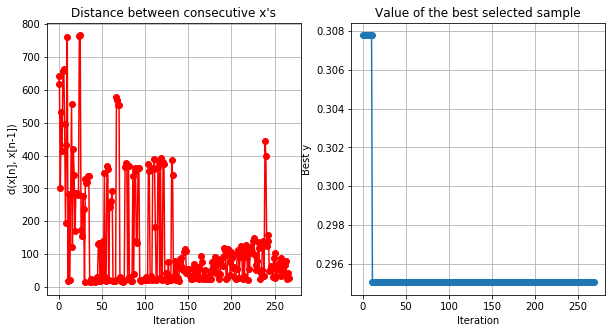

In [44]:
myBopt.plot_convergence()

In [45]:
for a in myBopt.x_opt:
    print('{:.2f},'.format(a),end=' ')

162.42, 8.01, 1.96, 582.26, 0.64, 913.55, 0.22, 

In [24]:
df.iloc[-4:]

,gameorder,lg_id,_iscopy,year_id,date_game,seasongame,is_playoffs,team_id,fran_id,pts,...,win_equiv,opp_id,opp_fran,opp_pts,opp_elo_i,opp_elo_n,game_location,game_result,forecast,notes
game_id,,,,,,,,,,,,,,,,,,,,,
201506090CLE,63154,NBA,0,2015,6/9/2015,99,1,CLE,Cavaliers,96,...,61.826408,GSW,Warriors,91,1797.5032,1790.9591,H,W,0.527843,NaN
201506110CLE,63155,NBA,0,2015,6/11/2015,100,1,CLE,Cavaliers,82,...,60.309792,GSW,Warriors,103,1790.9591,1809.9791,H,L,0.546572,NaN
201506140GSW,63156,NBA,0,2015,6/14/2015,102,1,GSW,Warriors,104,...,68.013329,CLE,Cavaliers,91,1704.3949,1700.7391,H,W,0.765565,NaN
201506170CLE,63157,NBA,0,2015,6/16/2015,102,1,CLE,Cavaliers,97,...,59.290245,GSW,Warriors,105,1813.6349,1822.2881,H,L,0.481450,NaN


In [617]:
prev_years = set()
prev_years2 = set()
if False:
    for year in sorted(df.year_id.unique()):
        teams = set(list(df[df.year_id == year].fran_id.unique()) + list(df[df.year_id == year].opp_fran.unique()))
        teams2 = set(list(df[df.year_id == year].team_id.unique()) + list(df[df.year_id == year].opp_id.unique()))

        if year > 1947:
            for t in prev_years:
                if not t in teams:
                    print('\t',t,year)
            for t in teams:
                if not t in prev_years:
                    print(t,year)

            for t in prev_years2:
                if not t in teams2:
                    print('\t',t,year)
            for t in teams2:
                if not t in prev_years2:
                    print(t,year) 
        prev_years = teams #prev_years.union(teams)
        prev_years2 = teams2 #prev_years2.union(teams2)